# Imports
---

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Cargar Data
___

- Cargo

In [2]:
df_data = pd.read_csv('./dataset_processed.csv', index_col=[0])

- Elimino/saco los 3 elementos categóricos

In [3]:
yCat = df_data['TargetCat']
aCat = df_data['ACat']
bCat = df_data['BCat']

In [4]:
df_data.drop(['TargetCat', 'ACat', 'BCat'], axis=1, inplace=True)
df_data.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_1', 'Valence A_2',
       'Valence A_3', 'Valence A_4', 'Valence A_5'],
      dtype='object')

# Split entre target y patron

---

- Split

In [5]:
x = df_data.drop('Lowest distortion', axis=1)
y = df_data['Lowest distortion']

- Validación

In [6]:
print(x.shape)
print(y.shape)

(284, 15)
(284,)


# Split entre train y test

___

- Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)

- Validación

In [8]:
print(x_train.shape)
print(x_test.shape)

(227, 15)
(57, 15)


# Escalamiento/Normalización de los datos 
---

In [9]:
st_scaler = StandardScaler() #Creo instancia del scaler
x_train = st_scaler.fit_transform(x_train) # escalo train
x_test = st_scaler.transform(x_test) #transformo test

# Entrenamiento del modelo 

---

> Defino función para crear objetos del modelo Logistic Regresion, bajo distintas configuraciones

In [10]:
def logistic_model(C_, solver_, multiclass_):
  model = LogisticRegression(random_state = 42, solver = solver_, multi_class = multiclass_, n_jobs = -1, C = C_)
  return model

> Itero sobre distintas configuraciones del modelo, buscando cual es la mejor

- Defino parámetros sobre los cuales iterar

In [11]:
# *** Clases ***
multiclass = ['ovr', 'multinomial']

# *** Algoritmos de solvers ***
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# *** Scores y params usados ***
scores = []
params = []

- Itero (Todas las pruebas las hago con dataset)

In [12]:
for algClass in multiclass:
    for algSolver in solver_list:
      try:
        #*** Instancio modelo ****
        model = logistic_model(1, algSolver, algClass)

        #*** Entreno modelo con train ****
        model.fit(x_train, y_train)

        #*** Predicción sobre test ****
        predictions = model.predict(x_test)

        #*** Evaluo desemeño comparando con testTarget ***
        accuracy = accuracy_score(y_test, predictions)

        #*** Guardo combinación usada y su score ***
        params.append(algClass + '/' + algSolver)
        scores.append(accuracy)
        
      except:
        # Hay algunas combinaciones no permitidas
        None # En ese caso, que no haga nada

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/s

> Evaluación Gráfica de los modelos

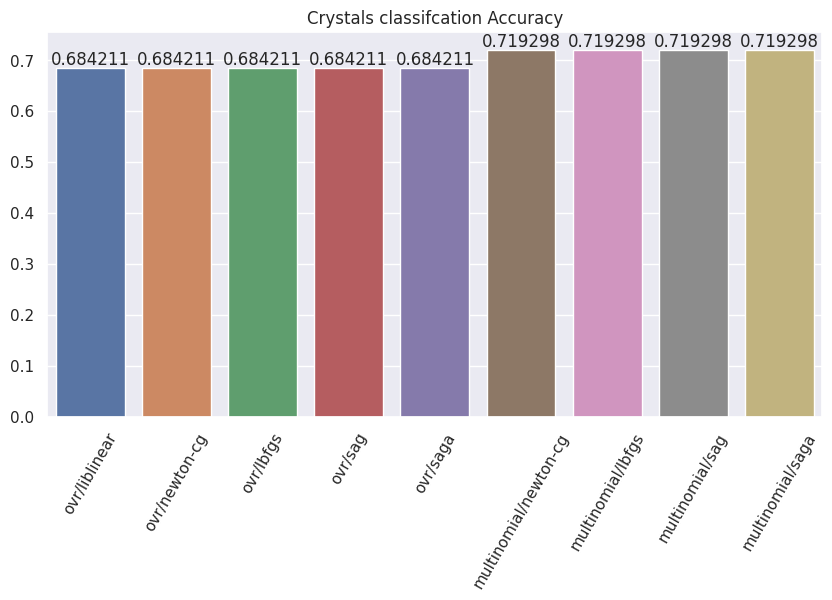

In [13]:
fig = plt.figure(figsize=(10,5))

splot = sns.barplot(x=params, y=scores)

splot.set_title('Crystals classifcation Accuracy')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

# Evaluación del modelo elegido
___

> Entrenamiento, predicción y evaluación general del modelo

- Creo objetos del modelo 

In [14]:
rl_model = logistic_model(1, 'newton-cg', 'multinomial')

- Entreno el modelo con train 

In [15]:
rl_model.fit(x_train, y_train)

LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='newton-cg')

> Predicción

- Hago predicciones con test

In [16]:
rl_predictions = rl_model.predict(x_test)

- Evaluación general respecto a testTarget

In [17]:
# Calculo accuracy

accuracy = []
accuracy.append(accuracy_score(y_test, predictions) )

# Defino datasets de la accuracy obtenida
modelEval = []
modelEval.append('Logistic Regression')

accuracy[-1]

0.7192982456140351

> Matriz de confusión

- Creo Matrices

In [18]:
cm_rl = confusion_matrix(y_test, rl_predictions, labels=rl_model.classes_)

- Grafico la matriz de confusión

Text(0.5, 40.24999999999997, 'Predicted Label')

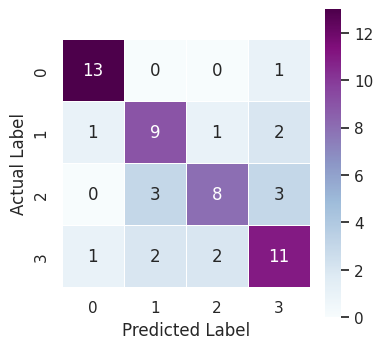

In [19]:
plt.figure(figsize=(4,4)) #tamaño de la figura
sns.heatmap(cm_rl, annot=True, linewidth=0.5, square=True, cmap='BuPu') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [20]:
np.unique(yCat)

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal'],
      dtype=object)

# Elementos extra de regresión logística
___

> Probabilidades de cada variable categórica por instancias

- Encontrar elemento con predicción errónea

In [21]:
failedPred = np.array(y_test) - np.array(rl_predictions)
failedPred

array([ 0,  0,  1,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  2,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0, -3,  0,  0, -1,  0,  0,  0,  1, -2,  1,  3,
       -1,  0,  0,  1,  0,  0])

In [22]:
print(np.array(y_test))
print(np.array(rl_predictions))

[0 3 2 2 1 3 3 2 0 3 0 3 2 2 0 3 3 1 2 0 1 0 0 3 0 1 1 3 3 1 3 2 2 0 1 2 0
 1 2 2 0 0 0 1 1 2 3 3 1 2 3 2 1 0 1 3 3]
[0 3 1 2 1 1 3 1 0 3 0 3 2 2 0 2 3 1 2 0 1 0 0 3 0 3 1 3 1 1 3 2 2 0 1 3 0
 1 3 2 3 0 0 2 1 2 3 2 3 1 0 3 1 0 0 3 3]


- Probabilidades del registro 3

In [23]:
rl_model.predict_proba(x_test)[3]

array([0.00955387, 0.4530101 , 0.49285932, 0.04457671])

> Pesos de los coeficietntes de los features que componen el patrón

- Pesos por cada feature

In [24]:
# Data (coeficintes y nombre correspondiente del feature)
coefs = rl_model.coef_[0]
fNames = x.columns.values

#Dict
weightsDict = {'Weights': coefs, 'Features': fNames}

# DF del Dict

weigths = pd.DataFrame(weightsDict)
weigths.sort_values(['Weights'], ascending=[True], inplace=True)

- Gráfica peso asignado a cada feature

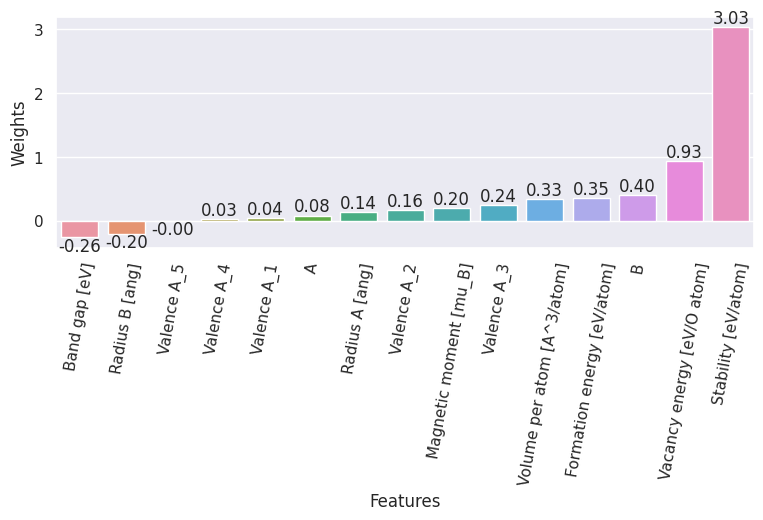

In [25]:
plt.figure(figsize=(9,3))

coefSplot = sns.barplot(data= weigths, x='Features', y='Weights')

plt.bar_label(coefSplot.containers[0],fmt='%.2f')
plt
plt.xticks(rotation=80)
plt.show()

# Random Forest

___

> Imports

In [26]:
from sklearn.ensemble import RandomForestClassifier

> Entrenamiento del modelo (Con dataset normal, RP, Categorical to Numerical)

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

> Predicciones

In [28]:
rf_predictions = rf_model.predict(x_test)

> Evaluación del modelo

In [29]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
accuracy.append(rf_accuracy)

modelEval.append('Random Forest')
accuracy[-1]

0.8070175438596491

> Matriz de Confusión

In [30]:
cm_rf = confusion_matrix(y_test, rf_predictions, labels=rf_model.classes_)

Text(0.5, 40.24999999999997, 'Predicted Label')

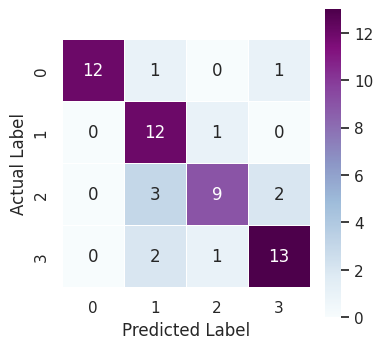

In [31]:
plt.figure(figsize=(4,4)) #tamaño de la figura
sns.heatmap(cm_rf, annot=True, linewidth=0.5, square=True, cmap='BuPu') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

> Gráfica de árbol de decisión

- Import

In [32]:
from sklearn.tree import plot_tree

- Plot

[Text(0.3911637931034483, 0.96875, 'B <= -1.501\ngini = 0.748\nsamples = 138\nvalue = [51, 54, 64, 58]\nclass = 2'),
 Text(0.15229885057471265, 0.90625, 'A <= -1.31\ngini = 0.133\nsamples = 6\nvalue = [1, 0, 13, 0]\nclass = 2'),
 Text(0.12931034482758622, 0.84375, 'Vacancy energy [eV/O atom] <= -0.435\ngini = 0.444\nsamples = 2\nvalue = [1, 0, 2, 0]\nclass = 2'),
 Text(0.10632183908045977, 0.78125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2, 0]\nclass = 2'),
 Text(0.15229885057471265, 0.78125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = 0'),
 Text(0.1752873563218391, 0.84375, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 11, 0]\nclass = 2'),
 Text(0.6300287356321839, 0.90625, 'Radius A [ang] <= 1.398\ngini = 0.749\nsamples = 132\nvalue = [50, 54, 51, 58]\nclass = 3'),
 Text(0.40948275862068967, 0.84375, 'Vacancy energy [eV/O atom] <= 0.861\ngini = 0.741\nsamples = 112\nvalue = [49, 51, 43, 30]\nclass = 1'),
 Text(0.19827586206896552, 0.78125, 'Volume per atom [A^3/atom] <= -1.48

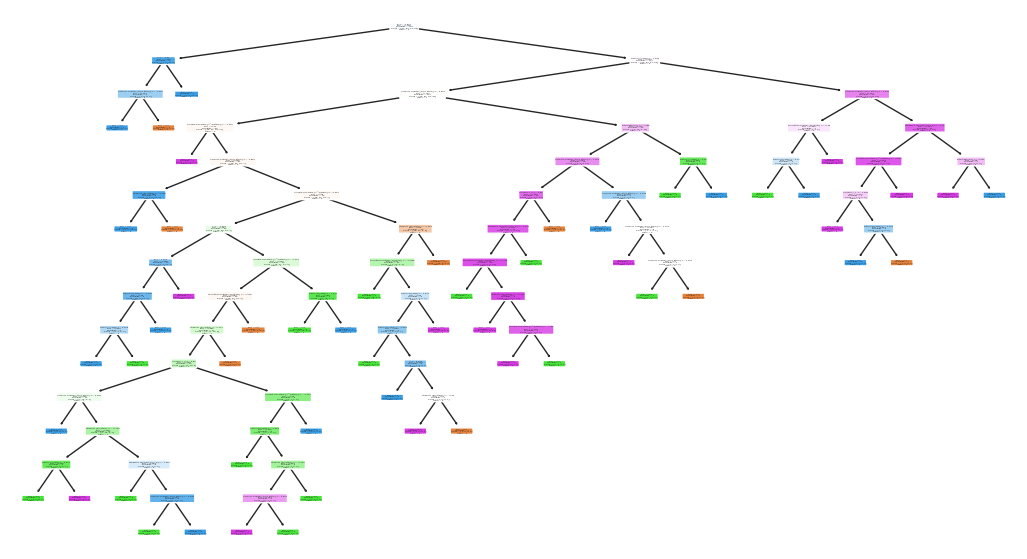

In [33]:
fig = plt.figure(figsize=(13, 7))

#Saco los targets como una str cada elemento
str_targets = str(y.unique()).replace('[', '').replace(']', '').split(' ')

plot_tree(rf_model.estimators_[0], feature_names=x.columns, class_names=str_targets, filled=True, impurity=True, rounded=True)

# Neural Networks
___

> Imports

In [34]:
import tensorflow as tf
from tensorflow import keras

2023-03-07 20:36:50.354438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 20:36:50.556299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 20:36:50.556337: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 20:36:50.604881: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-07 20:36:52.601433: W tensorflow/stream_executor/pla

> Crear la arquitectura, defino adentro cada layer

In [35]:
#creo el modelo y le doy la arquitectura

nn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(16, activation='softplus'),
    keras.layers.Dense(16, activation='softsign'),
    keras.layers.Dense(16, activation='selu'),
    keras.layers.Dense(16, activation='elu'),
    keras.layers.Dense(4, activation='softmax'),
])
# soft max da probabilidades a cada neurona del output

2023-03-07 20:36:55.229484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-07 20:36:55.229520: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-07 20:36:55.229542: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-57d44cd8-e30a-4be5-b9fd-7812e0bccc78): /proc/driver/nvidia/version does not exist
2023-03-07 20:36:55.229968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


> Compilar modelo

In [36]:
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

> Entrenar modelo, elijo la cantidad de epochs

In [37]:
nn_model.fit(x_train, y_train, epochs=400)

Epoch 1/400
8/8 [==============================] - 1s 2ms/step - loss: 1.3722 - accuracy: 0.3348
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 1.3339 - accuracy: 0.3348
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 1.3073 - accuracy: 0.3789
Epoch 4/400
8/8 [==============================] - 0s 2ms/step - loss: 1.2855 - accuracy: 0.4053
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 1.2550 - accuracy: 0.4361
Epoch 6/400
8/8 [==============================] - 0s 3ms/step - loss: 1.2267 - accuracy: 0.4670
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 1.2011 - accuracy: 0.4890
Epoch 8/400
8/8 [==============================] - 0s 5ms/step - loss: 1.1747 - accuracy: 0.5286
Epoch 9/400
8/8 [==============================] - 0s 2ms/step - loss: 1.1486 - accuracy: 0.5330
Epoch 10/400
8/8 [==============================] - 0s 2ms/step - loss: 1.1194 - accuracy: 0.5683
Epoch 11/400
8/8 [===========

> Predicción

- Predicciones

In [38]:
nn_predictions = nn_model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


- Verifico la probabilidad en algún elemento predicho

In [39]:
nn_predictions[1]

array([7.2793191e-16, 8.1769610e-07, 1.9420723e-13, 9.9999911e-01],
      dtype=float32)

In [40]:
np.array(y_test)

array([0, 3, 2, 2, 1, 3, 3, 2, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 2, 0, 1, 0,
       0, 3, 0, 1, 1, 3, 3, 1, 3, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1,
       1, 2, 3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 3])

- Traduzco probabildades a predicciones

In [41]:
nn_predictions_array = []
for prediction in nn_predictions:
    np_prediction = np.array(prediction)
    nn_predictions_array.append(np_prediction.argmax())

- Comparo predicciones y elementos reales

In [42]:
print(np.array(y_test))
print(np.array(nn_predictions_array))

[0 3 2 2 1 3 3 2 0 3 0 3 2 2 0 3 3 1 2 0 1 0 0 3 0 1 1 3 3 1 3 2 2 0 1 2 0
 1 2 2 0 0 0 1 1 2 3 3 1 2 3 2 1 0 1 3 3]
[0 3 1 1 1 1 1 3 0 3 0 3 0 2 0 2 3 1 3 0 1 0 0 3 3 3 3 1 0 1 3 2 2 0 1 3 0
 1 2 0 3 0 0 2 1 2 3 3 3 1 0 2 1 0 2 0 3]


> Evaluación con métodos de Tensor Flow

In [43]:
test_loss, test_acc = nn_model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 4.7053 - accuracy: 0.6140


In [44]:
accuracy.append(test_acc)

modelEval.append('Neural network')
test_acc

0.6140350699424744

> Matriz de confusión

In [45]:
##nn_model no tiene sus clases allí, igual le podría pasar las clases del y_test (target)
cm_nn = confusion_matrix(y_test, nn_predictions_array, labels=rf_model.classes_)

Text(0.5, 40.24999999999997, 'Predicted Label')

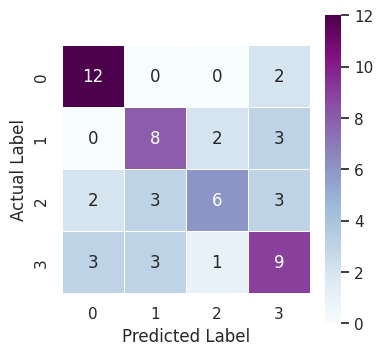

In [46]:
plt.figure(figsize=(4,4)) #tamaño de la figura
sns.heatmap(cm_nn, annot=True, linewidth=0.5, square=True, cmap='BuPu') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Comparación
___

> Gráfica accuracies

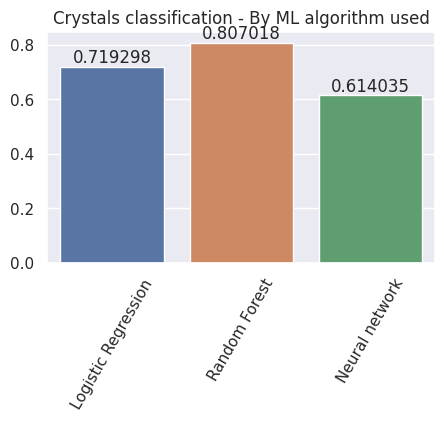

In [47]:
fig = plt.figure(figsize=(5,3))

splot = sns.barplot(x=modelEval, y=accuracy)

splot.set_title('Crystals classification - By ML algorithm used')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

> Matrices de confusión

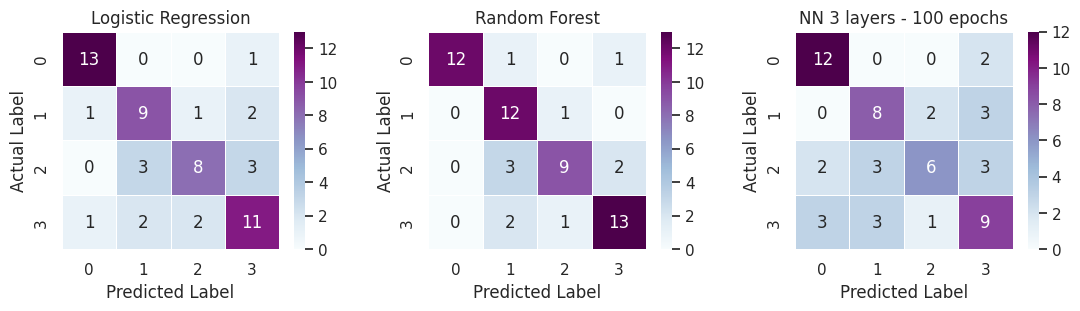

In [48]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11,3))

sns.heatmap(cm_rl, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[0]) 
sns.heatmap(cm_rf, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[1])
sns.heatmap(cm_nn, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[2]) 

axs[0].set_title('Logistic Regression')
axs[1].set_title('Random Forest')
axs[2].set_title('NN 3 layers - 100 epochs')

for plot in list(range(3)):
    axs[plot].set_ylabel('Actual Label')
    axs[plot].set_xlabel('Predicted Label')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57d44cd8-e30a-4be5-b9fd-7812e0bccc78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>